Load the weights of a pre-trained convolutional neural network, for example AlexNet or VGG, and use it as feature extraction method to train a linear model or MLP on the pets dataset. You should achieve at least 70% accuracy. It’s recommended you store the features on disk so you don’t have to recompute them for model selection. The pets dataset can be found here: http://www.robots.ox.ac.uk/~vgg/data/pets/ We will be working with the 37 class classification task. [10pts for loading model, 10pts for retraining, 10pts for 70% accuracy]

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
import pandas as pd
#import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import GridSearchCV
from keras import backend as K
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from scipy.misc import imread
import scipy.io as sio
import re

In [2]:
from keras.applications import VGG16

In [3]:
# build the VGG16 network
# pip install h5py
model = VGG16(include_top=False,
                           weights='imagenet')

In [15]:
import os
cwd = os.getcwd()
parent_path = os.path.split(os.getcwd())[0]
print ("parent path is {}".format(parent_path))

parent path is /home/yh2901/hw5/homework-v-yh1008


In [5]:
%%bash
find ../pets -name "yorkshire_terrier_9.jpg"

../pets/yorkshire_terrier_9.jpg


In [29]:
path_to_pets = "../pets/"

In [17]:
ls -l

total 132
-rw-rw-r-- 1 yh2901 yh2901   7390 Apr 29 02:59 Task4.ipynb
-rwxr-xr-x 1 yh2901 yh2901 126596 Apr 29 02:59 yorkshire_terrier_9.jpg*


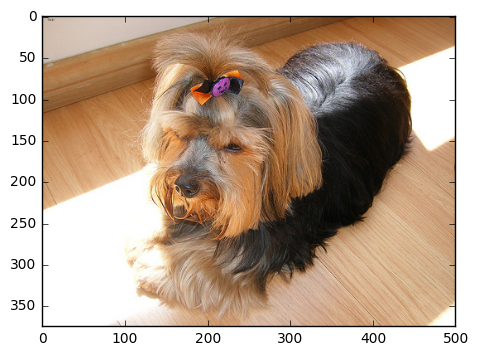

In [30]:
%matplotlib inline
from scipy.misc import imread
image1 = imread(path_to_pets + "yorkshire_terrier_9.jpg")
plt.imshow(image1)

In [25]:
# from keras.preprocessing import image
dir_list = os.listdir(path_to_pets)
dir_list = [f for f in os.listdir(path_to_pets) if re.match(r'[^\\]+\.jpg', f)]

In [28]:
print ("there are {} images in pets directory".format(len(dir_list)))

there are 7390 images in pets directory


In [34]:
f = dir_list[0]
path_to_pets + f

'../pets/basset_hound_24.jpg'

In [37]:
img = image.load_img('../pets/basset_hound_24.jpg')

In [38]:
images_list = [image.load_img(path_to_pets + f, target_size=(224, 224))
                 for f in dir_list]

In [39]:
len(images_list)

7390

In [43]:
# X = np.array([image.img_to_array(img) for img in images_list])

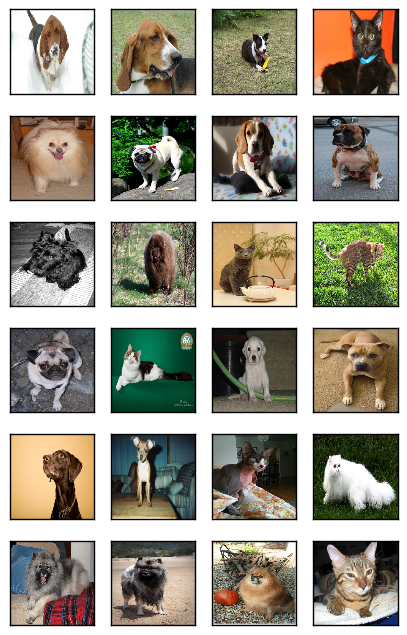

In [41]:
fig, axes = plt.subplots(6, 4, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(5, 8))
for img, ax in zip(images_list, axes.ravel()):
    ax.imshow(img)

In [57]:
uni_label = set([])
for f in dir_list:
    #uni_label.add(f.split("",2)[0])
    jpg_removed = f.split(".")[0]
    #print(jpg_removed)
    uni_label.add(jpg_removed.rsplit("_",1)[0])

In [58]:
len(uni_label)

37

In [59]:
labels = []
for f in dir_list:
    #uni_label.add(f.split("",2)[0])
    jpg_removed = f.split(".")[0]
    #print(jpg_removed)
    labels.append(jpg_removed.rsplit("_",1)[0])

In [63]:
labels[:3]

['basset_hound', 'basset_hound', 'staffordshire_bull_terrier']

In [64]:
dir_list[:3]

['basset_hound_24.jpg',
 'basset_hound_27.jpg',
 'staffordshire_bull_terrier_185.jpg']